In [14]:
from pycaret.utils import version
version()

'2.1.2'

In [15]:
import pycaret

In [45]:
from pycaret.classification import *
import pandas as pd 
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test_x.csv',index_col=0)
def tp_score(train):
    train['diligence']=(train['tp03']+ 8-train['tp08'])/2
    train['Affinity']=(train['tp07']+ 8-train['tp02'])/2
    train['emotional stability']=(train['tp09']+ 8-train['tp04'])/2
    train['openness']=(train['tp05']+ 8-train['tp10'])/2
    train['extroversion']=(train['tp01']+ 8-train['tp06'])/2
    train.drop([ 'tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10'],axis=1,inplace=True)
    return train
train=tp_score(train)
test=tp_score(test)

In [46]:
train.age_group=train.age_group.apply(lambda x : int(x.replace('0s','')) )
test.age_group=test.age_group.apply(lambda x : int(x.replace('0s','')) )

In [47]:
def stupid(train):
    train['stupidity']=train[ 'wf_01']+train[ 'wf_02']+train['wf_03']
    train['intellectual']=train[['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07','wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']].sum(axis=1)
    train.drop([ 'wf_01','wf_02','wf_03','wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07','wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],axis=1,inplace=True) 
    return train
train=stupid(train)
test=stupid(test)

In [35]:
train['Q_E_Sum']=train[['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']].sum(axis=1)
train=train.drop(['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE'], axis=1)
test['Q_E_Sum']=test[['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']].sum(axis=1)
test=test.drop(['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE'], axis=1)

In [5]:
#tup=tuple(train[['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']].values[0])

KeyError: "None of [Index(['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',\n       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE'],\n      dtype='object')] are in the [columns]"

In [9]:
## 응답에 걸린 시간
#import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab

# sns.distplot(pd.Series(tup)*0.001)
#_ = plt.hist(pd.Series(tup).values, bins='auto') 

#plt.subplots_adjust(left=0.15)
#plt.show()

NameError: name 'tup' is not defined

In [61]:
na=[]
for i in range(len(name)):
    na.append(list(train[train[name[i]]>5000].index))
list_of_lists=[i for i in na]
import itertools
index=list(set(list(itertools.chain(*list_of_lists))))

In [5]:
for i in range(len(name)):
    train[name[i]] = train[name[i]].apply(lambda x : 6000 if x > 6000 else x)
train    

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_11,wr_12,wr_13,diligence,Affinity,emotional stability,openness,extroversion,stupidity,intellectual
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,1,3.0,6.5,5.5,3.5,4.5,0,7
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,0,1,1,2.0,5.0,4.0,2.5,3.5,0,8
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,0,1,1,1.5,3.5,2.0,4.0,3.0,1,10
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1.5,3.5,2.0,1.0,3.5,1,11
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,...,0,0,0,3.0,3.0,4.5,5.0,5.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45526,4.0,454,5.0,1007,4.0,758,2.0,1117,3.0,946,...,0,1,1,6.0,4.5,7.0,2.5,5.0,0,6
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,0,1,1,7.0,4.5,6.5,3.0,1.5,1,10
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,0,1,1,3.0,4.5,3.0,2.0,3.5,1,11


In [7]:
## family size 
train['familysize'] = train['familysize'].apply(lambda x : 30 if x > 30 else x)
train['familysize'].value_counts()    

2     17918
3     11256
1      6535
4      4907
5      1962
0      1217
6       838
7       387
8       221
9       126
10       59
11       39
12       21
13       11
14        9
15        8
30        8
17        3
21        2
16        2
20        2
18        1
Name: familysize, dtype: int64

In [48]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,religion,urban,voted,diligence,Affinity,emotional stability,openness,extroversion,stupidity,intellectual
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,Other,1,2,3.0,6.5,5.5,3.5,4.5,0,7
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,Hindu,3,2,2.0,5.0,4.0,2.5,3.5,0,8
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,Other,2,1,1.5,3.5,2.0,4.0,3.0,1,10
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,Hindu,3,1,3.0,2.5,4.0,3.0,3.5,0,5
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,Agnostic,1,1,1.5,3.5,2.0,1.0,3.5,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,Jewish,3,2,7.0,4.5,6.5,3.0,1.5,1,10
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,Atheist,1,2,3.0,4.5,3.0,2.0,3.5,1,11
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,Christian_Other,2,1,4.0,2.0,2.5,1.0,5.5,0,9


In [11]:
train=train[~train.index.isin(index)]
train.reset_index(inplace=True)
train.drop('index',axis=1,inplace=True)

NameError: name 'index' is not defined

In [49]:
train['race']=train.race.apply(lambda x : 1 if x=='White' else 0 ) 
train['hand']=train.hand.apply(lambda x : 1 if x==1 else 0 )

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train1=pd.concat([train[train.columns.difference(['education','gender', 'religion','voted','married','urban'])] ,pd.get_dummies(train[['education','gender','religion','married','urban']])],axis=1)
train1.drop(['gender_Male'],axis=1,inplace=True)
X=train1 #(45532, 100) w/o voted
scaler.fit(X)
X=scaler.transform(X)
train=pd.concat([pd.DataFrame(X),train['voted']],axis=1) #타겟도 같이 벡터화 기기


test['race']=test.race.apply(lambda x : 1 if x=='White' else 0 )
test['hand']=test.hand.apply(lambda x : 1 if x==1 else 0 )
test=pd.concat([test[test.columns.difference(['education','gender', 'religion','married','urban'])] ,pd.get_dummies(test[['education','gender',  'religion','married','urban']])],axis=1)
test.drop(['gender_Male'],axis=1,inplace=True)
test=scaler.fit_transform(test)
test=pd.DataFrame(test)

In [52]:
train.columns = ['47', '52', '31', '35', '20', '43', '32', '28', '62', '51', '41', '29', '16', '57', '13', '7', '64', '33', '59', '30', '12', '11', '34', '21', '10', '0', '48', '2', '58', '9', '27', '22', '36', '5', '42', '24', '56', '63', '65', '15', '60', '3', '19', '49', '39', '4', '8', '6', '44', '17', '18', '1', '53', '55', '26', '14', '50', '45', '25', '67', '54', '23', '38', '46', '37', '61', '66', '40','voted']
test.columns = ['47', '52', '31', '35', '20', '43', '32', '28', '62', '51', '41', '29', '16', '57', '13', '7', '64', '33', '59', '30', '12', '11', '34', '21', '10', '0', '48', '2', '58', '9', '27', '22', '36', '5', '42', '24', '56', '63', '65', '15', '60', '3', '19', '49', '39', '4', '8', '6', '44', '17', '18', '1', '53', '55', '26', '14', '50', '45', '25', '67', '54', '23', '38', '46', '37', '61', '66', '40']

In [53]:
import numpy as np
clf = setup(data = train, target = 'voted',ignore_low_variance = True, n_jobs=None)

,Description,Value
0,session_id,7552
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 69)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [54]:
lgbm=create_model('lightgbm',learning_rate=0.1)
gbc=create_model('gbc',learning_rate=0.1) 
catboost=create_model('catboost',learning_rate=0.1) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6835,0.7564,0.6676,0.7277,0.6964,0.3671,0.3686
1,0.6600,0.7351,0.6336,0.7098,0.6695,0.3217,0.3239
2,0.6762,0.7532,0.6619,0.7200,0.6897,0.3524,0.3538
3,0.6903,0.7597,0.6728,0.7352,0.7026,0.3809,0.3825
4,0.6922,0.7581,0.6630,0.7432,0.7008,0.3860,0.3886
5,0.6840,0.7605,0.6624,0.7312,0.6951,0.3689,0.3708
6,0.6850,0.7489,0.6694,0.7291,0.6980,0.3700,0.3715
7,0.6875,0.7531,0.6572,0.7391,0.6958,0.3768,0.3795
8,0.6765,0.7428,0.6492,0.7267,0.6858,0.3546,0.3570
9,0.6793,0.7504,0.6624,0.7243,0.6920,0.3589,0.3605


In [55]:
tuned_lgbm=tune_model(lgbm)
tuned_gbc=tune_model(gbc)
tuned_catboost=tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6995,0.7669,0.6526,0.7606,0.7025,0.4025,0.4073
1,0.6801,0.7486,0.6249,0.7454,0.6798,0.3650,0.3707
2,0.6887,0.7604,0.6457,0.7475,0.6929,0.3808,0.3850
3,0.6975,0.7702,0.6474,0.7607,0.6995,0.3990,0.4042
4,0.6991,0.7654,0.6457,0.7643,0.7000,0.4024,0.4082
5,0.7047,0.7770,0.6676,0.7602,0.7109,0.4118,0.4154
6,0.7025,0.7634,0.6509,0.7668,0.7041,0.4091,0.4146
7,0.7019,0.7654,0.6411,0.7721,0.7005,0.4088,0.4159
8,0.6928,0.7576,0.6336,0.7614,0.6917,0.3907,0.3973
9,0.6903,0.7643,0.6370,0.7551,0.6911,0.3851,0.3907


In [56]:
blended = blend_models([tuned_lgbm,tuned_gbc,tuned_catboost], fold = 10, method = 'soft') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7039,0.7681,0.6526,0.7678,0.7056,0.4117,0.4172
1,0.6785,0.7494,0.6203,0.7455,0.6772,0.3623,0.3684
2,0.6890,0.7615,0.6422,0.7500,0.6919,0.3818,0.3865
3,0.6988,0.7699,0.6532,0.7592,0.7022,0.4009,0.4056
4,0.7003,0.7660,0.6480,0.7650,0.7017,0.4048,0.4104
5,0.6978,0.7741,0.6590,0.7543,0.7034,0.3983,0.4021
6,0.7022,0.7637,0.6561,0.7631,0.7056,0.4078,0.4126
7,0.7007,0.7622,0.6469,0.7662,0.7015,0.4056,0.4114
8,0.6938,0.7566,0.6324,0.7638,0.6919,0.3928,0.3997
9,0.6903,0.7659,0.6399,0.7534,0.6920,0.3847,0.3899


In [57]:
predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6928,0.7665,0.6475,0.7623,0.7002,0.3895,0.3950


,47,52,31,35,20,43,32,28,62,51,...,14_1.0,50_1.0,45_0.0,67_0.0,23_0.0,38_0.0,66_1.0,voted,Label,Score
0,0.071429,0.00,0.000288,0.00,0.000182,0.25,0.001617,0.25,0.000555,0.75,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2,2,0.7093
1,0.500000,1.00,0.000117,0.75,0.000112,1.00,0.000599,0.00,0.000422,0.00,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2,2,0.8011
2,0.428571,0.00,0.000193,1.00,0.000104,1.00,0.000656,0.00,0.000475,0.00,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2,2,0.8301
3,0.428571,0.25,0.000143,0.25,0.000177,0.75,0.001801,0.25,0.000430,0.25,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2,2,0.8559
4,0.142857,0.25,0.000990,0.00,0.000688,0.00,0.002363,0.25,0.002176,0.25,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2,1,0.7042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13655,0.285714,0.25,0.000891,0.25,0.000475,0.25,0.001177,0.50,0.001234,0.50,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0.7888
13656,0.285714,0.00,0.000190,1.00,0.000111,1.00,0.000467,0.00,0.000646,0.00,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2,2,0.5436
13657,0.785714,0.75,0.000623,0.50,0.000369,0.25,0.001515,0.00,0.000602,0.00,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2,1,0.6857
13658,0.642857,0.50,0.000160,0.00,0.000107,0.00,0.000742,0.00,0.000471,0.25,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0.5831


In [58]:
# final_model=finalize_model(blended)
predict=predict_model(blended, data=test) 

In [59]:
submission=pd.DataFrame(data={'voted':predict['Score']})
submission.reset_index(inplace=True)
submission.to_csv('submission/submission46.csv',index=False)

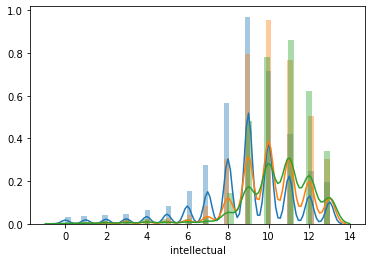

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
arbitrary=train[[ 'voted', 'stupidity','intellectual']]
sns.distplot(arbitrary[arbitrary['stupidity']==0]['intellectual'],label='smart')
sns.distplot(arbitrary[arbitrary['stupidity']==1]['intellectual'],label='normal')
sns.distplot(arbitrary[arbitrary['stupidity']==2]['intellectual'],label='stupid')